##STEP 1: CREATING THE BLURRY/SHARP CATEGOIES FROM THE [CIFAR-10 DATASET](https://www.kaggle.com/competitions/cifar-10/data?select=train.7z)

In [19]:
from google.colab import drive
drive.mount('/content/drive')

import os


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


STEP 1B: Creating a proper project folder and dataset structures

In [20]:
project_path = "/content/drive/MyDrive/Image_Quality_Blur_Detection"
dataset_path = os.path.join(project_path, "dataset")

for folder in ["original", "sharp", "blurry", "models", "results"]:
    os.makedirs(os.path.join(project_path, folder if folder in ["models", "results"] else "dataset/" + folder), exist_ok=True)



"""project_path = "/content/drive/MyDrive/Image_Quality_Blur_Detection"
dataset_path = f"{project_path}/dataset"

os.makedirs(f"{dataset_path}/original", exist_ok=True)
os.makedirs(f"{dataset_path}/sharp", exist_ok=True)
os.makedirs(f"{dataset_path}/blurry", exist_ok=True)
os.makedirs(f"{project_path}/models", exist_ok=True)
os.makedirs(f"{project_path}/results", exist_ok=True)

os.listdir(project_path)"""


'project_path = "/content/drive/MyDrive/Image_Quality_Blur_Detection"\ndataset_path = f"{project_path}/dataset"\n\nos.makedirs(f"{dataset_path}/original", exist_ok=True)\nos.makedirs(f"{dataset_path}/sharp", exist_ok=True)\nos.makedirs(f"{dataset_path}/blurry", exist_ok=True)\nos.makedirs(f"{project_path}/models", exist_ok=True)\nos.makedirs(f"{project_path}/results", exist_ok=True)\n\nos.listdir(project_path)'

Load CIFAR-10 in google colab automatically using tensorflow

In [13]:

import tensorflow as tf

(x_train, y_train), (_, _) = tf.keras.datasets.cifar10.load_data()

print(x_train.shape)


(50000, 32, 32, 3)


In [21]:
#save images to drive
import cv2

original_path = os.path.join(dataset_path, "original")
num_images = 500  # using 500 images for this project

for i in range(num_images):
    img = x_train[i]
    # Convert from RGB to BGR for OpenCV
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(os.path.join(original_path, f"img_{i}.jpg"), img_bgr)

print("Original images saved:", len(os.listdir(original_path)))



"""original_path = "/content/drive/MyDrive/Image_Quality_Blur_Detection/dataset/original"

num_images = 500 #using only 500 images from the dataset

for i in range(num_images):
    img = x_train[i]
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(f"{original_path}/img_{i}.jpg", img_bgr) #converting CIFAR-10 images to jpg

len(os.listdir(original_path))"""


Original images saved: 500


'original_path = "/content/drive/MyDrive/Image_Quality_Blur_Detection/dataset/original"\n\nnum_images = 500 #using only 500 images from the dataset\n\nfor i in range(num_images):\n    img = x_train[i]\n    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)\n    cv2.imwrite(f"{original_path}/img_{i}.jpg", img_bgr) #converting CIFAR-10 images to jpg\n\nlen(os.listdir(original_path))'

In [22]:
#creating the "sharp" class label
import shutil

sharp_path = os.path.join(dataset_path, "sharp")

# Copy original images to sharp folder (no modification)
for file in os.listdir(original_path):
    shutil.copy(os.path.join(original_path, file), os.path.join(sharp_path, file))

print("Sharp images copied:", len(os.listdir(sharp_path)))

"""sharp_path = "/content/drive/MyDrive/Image_Quality_Blur_Detection/dataset/sharp"

for file in os.listdir(original_path):
    shutil.copy(
        os.path.join(original_path, file),
        os.path.join(sharp_path, file)
    )

len(os.listdir(sharp_path))"""


Sharp images copied: 500


'sharp_path = "/content/drive/MyDrive/Image_Quality_Blur_Detection/dataset/sharp"\n\nfor file in os.listdir(original_path):\n    shutil.copy(\n        os.path.join(original_path, file),\n        os.path.join(sharp_path, file)\n    )\n\nlen(os.listdir(sharp_path))'

In [24]:
#generate blurry images
#define paths

blurry_path = os.path.join(dataset_path, "blurry")
blur_kernel = (7, 7)  # Controls the strength of Gaussian blur

# Apply Gaussian blur to all images in 'sharp' folder
for filename in os.listdir(sharp_path):
    img_path = os.path.join(sharp_path, filename)
    img = cv2.imread(img_path)
    if img is None:
        continue
    blurred_img = cv2.GaussianBlur(img, blur_kernel, 0)
    cv2.imwrite(os.path.join(blurry_path, filename), blurred_img)

print("Blurry images created:", len(os.listdir(blurry_path)))





Blurry images created: 500


In [25]:
"""base_path = "/content/drive/MyDrive/Image_Quality_Blur_Detection/dataset"

os.makedirs(f"{base_path}/original", exist_ok=True)
os.makedirs(f"{base_path}/sharp", exist_ok=True)
os.makedirs(f"{base_path}/blurry", exist_ok=True)

os.listdir(base_path)

#apply blur automatically
blur_kernel = (7, 7)  # controls blur strength

for filename in os.listdir(sharp_path):
    img_path = os.path.join(sharp_path, filename)
    img = cv2.imread(img_path)

    if img is None:
        continue

    blurred_img = cv2.GaussianBlur(img, blur_kernel, 0)
    cv2.imwrite(os.path.join(blurry_path, filename), blurred_img)

len(os.listdir(blurry_path))
"""

'base_path = "/content/drive/MyDrive/Image_Quality_Blur_Detection/dataset"\n\nos.makedirs(f"{base_path}/original", exist_ok=True)\nos.makedirs(f"{base_path}/sharp", exist_ok=True)\nos.makedirs(f"{base_path}/blurry", exist_ok=True)\n\nos.listdir(base_path)\n\n#apply blur automatically\nblur_kernel = (7, 7)  # controls blur strength\n\nfor filename in os.listdir(sharp_path):\n    img_path = os.path.join(sharp_path, filename)\n    img = cv2.imread(img_path)\n\n    if img is None:\n        continue\n\n    blurred_img = cv2.GaussianBlur(img, blur_kernel, 0)\n    cv2.imwrite(os.path.join(blurry_path, filename), blurred_img)\n\nlen(os.listdir(blurry_path))\n'

##STEP 2: LOADING THE DATA

In [78]:
#creating class list to predict
class_names = ["original", "sharp", "blurry"]

In [79]:
args = {
    "labels": "inferred",
    "label_mode": "categorical",
    "batch_size": 32,
    "image_size": (32, 32),
    "seed": 1,
    "validation_split": 0.2,
    "class_names":class_names
}

print("args defined")


args defined


In [80]:

import tensorflow as tf

train = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Image_Quality_Blur_Detection/dataset",
    subset="training",
    **args
)

test = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Image_Quality_Blur_Detection/dataset",
    subset="validation",
    **args
)


Found 1500 files belonging to 3 classes.
Using 1200 files for training.
Found 1500 files belonging to 3 classes.
Using 300 files for validation.


In [81]:

train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

##STEP 3: EXPLORING IMAGES IN THE DATA

In [82]:
for images, labels in train.take(1):
    print(images.shape)
    print(labels.shape)


(32, 32, 32, 3)
(32, 3)


In [83]:
#extracting a single image and seeing what it represents
single_image = images[0]
single_label = labels[0]

print(single_image.shape)
print(single_label)


(32, 32, 3)
tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)


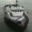

In [84]:
#Import image from Pillow
from PIL import Image
import numpy as np

#converting numerical pixels into viewable image
img = Image.fromarray(single_image.numpy().astype("uint8"))
img

In [85]:
labels[0]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 0., 0.], dtype=float32)>

In [86]:
label_index = single_label.numpy().argmax()
class_name = train.class_names[label_index]

print("Label vector:", single_label.numpy())
print("Class:", class_name)


Label vector: [1. 0. 0.]
Class: original


In [87]:
labels[1]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 1., 0.], dtype=float32)>

In [37]:
label_index = single_label.numpy().argmax()
class_name = train.class_names[label_index]

print("Label vector:", single_label.numpy())
print("Class:", class_name)


Label vector: [1. 0. 0.]
Class: original


## STEP 4: TRAINING AN INITIAL CONVOLUTIONAL LAYER

In [38]:
#Prefetching the datasets as this loads batches into memory before the model asks for them
AUTOTUNE = tf.data.AUTOTUNE #AUTOTUNE allows tensorflow pick the optimal prefatch size

train = train.prefetch(buffer_size = AUTOTUNE)
test = test.prefetch(buffer_size = AUTOTUNE)



In [39]:
#Importing necessary Keras modules

from tensorflow.keras import layers #layers contains convolutional, flatten, dense and other layers
from tensorflow.keras.models import Sequential # this makes the model process layers in order



In [40]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax') # Corrected to 3 classes
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
#Complile the model
model.compile(
    optimizer='adam', #this adjusts weight to minimize loss
    loss = 'categorical_crossentropy', #measures how wrong the model is
    metrics = ['accuracy'] # for monitoring during training
)

In [42]:
#Train the model
#history stores accuracy/loss over epochs
history = model.fit(
    train,
    validation_data = test, #monitors performance on unseen data
    epochs = 5 #the model will see the entire dataset 5 times
)

Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - accuracy: 0.2981 - loss: 1.7295 - val_accuracy: 0.3167 - val_loss: 1.0986
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.3809 - loss: 1.0856 - val_accuracy: 0.4400 - val_loss: 1.0694
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.4605 - loss: 1.0225 - val_accuracy: 0.2300 - val_loss: 1.0613
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.4924 - loss: 0.9689 - val_accuracy: 0.5167 - val_loss: 0.9606
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.5543 - loss: 0.8816 - val_accuracy: 0.4133 - val_loss: 0.8985


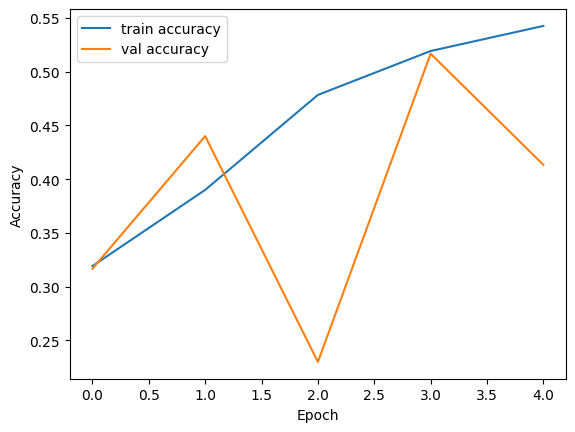

In [43]:
#Checking accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## STEP 5: LOOKING AT THE MODEL ERROR

In [44]:
#lets check the summary of the model layers, output shapes and parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,294,923 (24.01 MB)

 Trainable params: 2,098,307 (8.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,196,616 (16.01 MB)

<Axes: >

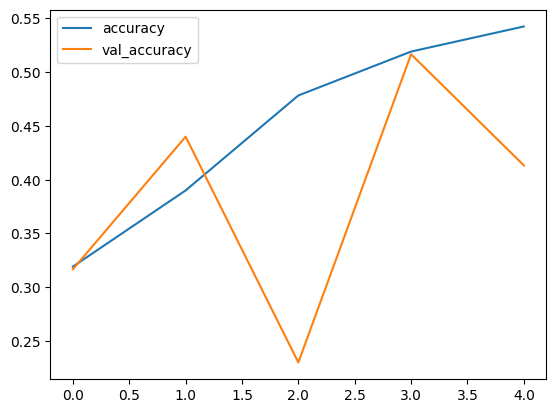

In [45]:
#using pandas to graph out how the accuracies changed over time
import pandas as pd

history_df = pd.DataFrame.from_dict(history.history)
history_df[["accuracy", "val_accuracy"]].plot()

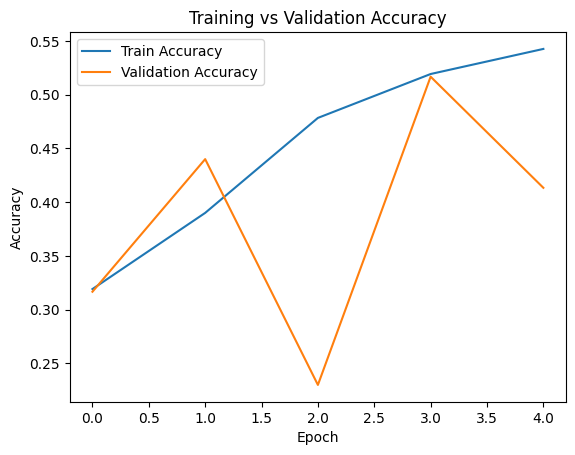

In [46]:
import matplotlib.pyplot as plt

plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


##STEP 6: IMPROVING THE MODEL ACCURACY

In [47]:
def build_and_train_model(train, test, epochs = 10):

  model = Sequential([
      layers.Rescaling(1./255, input_shape=(32,32,3)),

      layers.Conv2D(32,(3,3), activation='relu', padding = 'same'),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(64,(3,3), activation='relu', padding = 'same'),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(128,(3,3), activation='relu', padding = 'same'),
      layers.MaxPooling2D((2,2)),

      layers.Flatten(),
      layers.Dropout(0.3),
      layers.Dense(128, activation='relu'),

      layers.Dense(3, activation='softmax') #3 classes blurry, original and sharp
  ])

  model.compile(
      optimizer='adam',
      loss = 'categorical_crossentropy',
      metrics = ['accuracy']
  )

  history = model.fit(
      train,
      validation_data = test,
      epochs = epochs
  )

  history_df = pd.DataFrame.from_dict(history.history)
  return history_df, model

In [48]:
#running the improved model
history_df, model = build_and_train_model(train, test, epochs = 10)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.4297 - loss: 1.0334 - val_accuracy: 0.6267 - val_loss: 0.6968
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - accuracy: 0.5983 - loss: 0.6915 - val_accuracy: 0.6133 - val_loss: 0.5463
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.6637 - loss: 0.5551 - val_accuracy: 0.6500 - val_loss: 0.4868
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.6495 - loss: 0.5691 - val_accuracy: 0.6867 - val_loss: 0.5155
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - accuracy: 0.6871 - loss: 0.5239 - val_accuracy: 0.6433 - val_loss: 0.4808
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.6580 - loss: 0.4955 - val_accuracy: 0.6900 - val_loss: 0.4643
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.6760 - loss: 0.4938 - val_accuracy: 0.5767 - val_loss: 0.7714
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.6238 - loss: 0.6890 - val_accuracy: 0.6067 - val

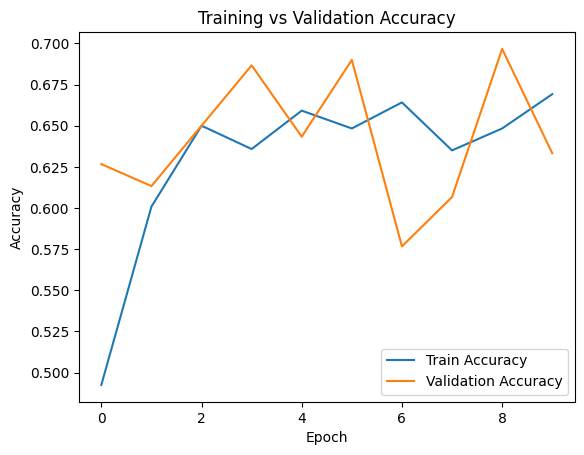

In [49]:
import matplotlib.pyplot as plt

plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

## STEP 7: AUGMENTING THE DATA


In [50]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", seed=1),
    layers.RandomRotation(0.1, seed=1),
    layers.RandomZoom(0.1, seed=1)
])

In [51]:
def build_augmented_model(train_ds, val_ds, epochs=15):
    model = Sequential([
        data_augmentation,                  # Augment images first
        layers.Rescaling(1./255, input_shape=(32,32,3)),

        # Conv + MaxPooling layers (same as Step 6)
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),

        layers.Dense(3, activation='softmax')  # 3 classes: blurry/original/sharp
    ])

    # Compile
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs
    )

    history_df = pd.DataFrame(history.history)
    return history_df, model


In [52]:
history_aug_df, augmented_model = build_augmented_model(train, test, epochs=20)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.3436 - loss: 1.1011 - val_accuracy: 0.3600 - val_loss: 1.0145
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.5269 - loss: 0.9020 - val_accuracy: 0.6500 - val_loss: 0.7111
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 0.5908 - loss: 0.7632 - val_accuracy: 0.6400 - val_loss: 0.5977
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.5814 - loss: 0.7442 - val_accuracy: 0.6600 - val_loss: 0.5113
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.6346 - loss: 0.6074 - val_accuracy: 0.6733 - val_loss: 0.4920
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.6318 - loss: 0.5886 - val_accuracy: 0.6633 - val_loss: 0.5430
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.5762 - loss: 0.7320 - val_accuracy: 0.6567 - val_loss: 0.5227
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.6369 - loss: 0.5638 - val_accuracy: 0

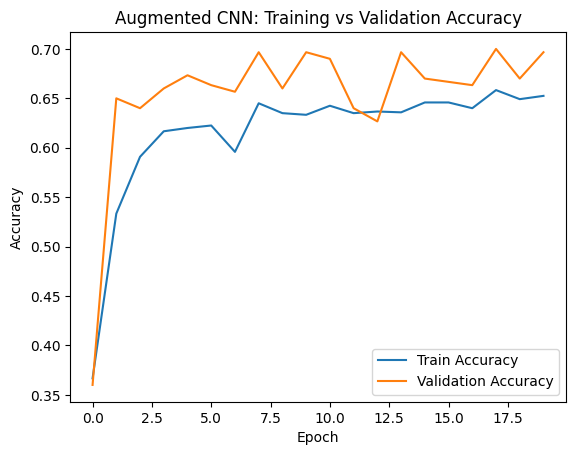

In [53]:
import matplotlib.pyplot as plt

plt.plot(history_aug_df['accuracy'], label='Train Accuracy')
plt.plot(history_aug_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Augmented CNN: Training vs Validation Accuracy')
plt.legend()
plt.show()


## STEP 8: INVESTIGATING MODEL ERRORS: BLURRY/SHARP

In [54]:
import numpy as np
import itertools
import io
import base64

In [55]:
#generating predictions for the validation/test set
pred_probs = augmented_model.predict(test)
pred_classes = np.argmax(pred_probs, axis=1) #converting probabilities to class index


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


In [56]:
#getting the actual labels
true_labels = np.concatenate([y for x, y in test], axis=0)
true_classes = np.argmax(true_labels, axis=1)
#predicted class and true class are now numeric arrays

In [57]:
pred_classes


array([2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2])

In [58]:
true_labels

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

In [59]:
true_classes

array([2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 2, 1, 2,
       0, 2, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 2, 2,
       0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 2, 2, 0, 1, 1,
       2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 2, 1,
       2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0,
       2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 2, 0, 1, 1,
       1, 2, 2, 2, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2])

In [60]:
#extracting images from the dataset
images = np.concatenate([x for x, y in test], axis=0)

#convert numpy arrays to PIL images
pil_images = [Image.fromarray((img * 255).astype("uint8")) for img in images]

#we multiply by 255 because we scalled the images to 0-1 for training

In [75]:
#creating a dataframe with predictions, labels and images
df_results = pd.DataFrame({
    'image': pil_images,
    'true_label': true_classes,
    'pred_label': pred_classes,
   })

#mapping numeric lables to human readable names
class_names = ["original", "sharp", "blurry"]
df_results['true_label_name'] = df_results['true_label'].map(lambda x: class_names[x])
df_results['pred_label_name'] = df_results['pred_label'].map(lambda x: class_names[x])

In [76]:
#render images in colab
def render_image(img):
  buffer = io.BytesIO()
  img.save(buffer, format='png')
  img_str = base64.b64encode(buffer.getvalue()).decode("utf-8")
  return f'<img src="data:image/png;base64,{img_str}" width="64" height="64">'

,image,true_label,pred_label,true_label_name,pred_label_name
0,,2,2,blurry,blurry
1,,1,2,sharp,blurry
2,,1,1,sharp,sharp
3,,2,1,blurry,sharp
4,,0,1,original,sharp
5,,1,1,sharp,sharp
6,,1,1,sharp,sharp
7,,2,1,blurry,sharp
8,,0,1,original,sharp
9,,0,1,original,sharp

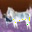
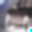
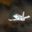
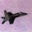
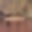
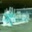
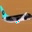
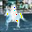
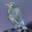
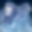

In [77]:
from IPython.display import display,HTML

#display the first 10 images with predictions
display(HTML(df_results.head(10).to_html(escape=False, formatters={'image':render_image})))

In [64]:
# Misclassified examples
misclassified = df_results[df_results['true_label_name'] != df_results['pred_label_name']]
misclassified.head(10)


,image,true_label,pred_label,true_label_name,pred_label_name
1,<PIL.Image.Image image mode=RGB size=32x32 at ...,1,2,sharp,blurry
3,<PIL.Image.Image image mode=RGB size=32x32 at ...,2,1,blurry,sharp
4,<PIL.Image.Image image mode=RGB size=32x32 at ...,0,1,original,sharp
7,<PIL.Image.Image image mode=RGB size=32x32 at ...,2,1,blurry,sharp
8,<PIL.Image.Image image mode=RGB size=32x32 at ...,0,1,original,sharp
9,<PIL.Image.Image image mode=RGB size=32x32 at ...,0,1,original,sharp
10,<PIL.Image.Image image mode=RGB size=32x32 at ...,1,2,sharp,blurry
11,<PIL.Image.Image image mode=RGB size=32x32 at ...,2,1,blurry,sharp
12,<PIL.Image.Image image mode=RGB size=32x32 at ...,2,1,blurry,sharp
13,<PIL.Image.Image image mode=RGB size=32x32 at ...,2,1,blurry,sharp


In [65]:
misclassified['true_label_name'].value_counts()


,count
true_label_name,
original,91
blurry,72
sharp,34
